In [1]:
import os
import pandas as pd 
#from pandasai import PandasAI 
from pandasai import SmartDataframe
# import pandasai
# from pandasai.llm import OpenAI
# from pandasai.llm import BambooLLM

In [2]:
# os.environ["PANDASAI_API_KEY"] = "$2a$10$5vCk0P/8DGDFzS8zoALgS.ytEJg.oJB597P3EtTdjanbO3uQDh8Ba"
PANDAS_API_KEY="$2a$10$og1ggI1AwW12m9Cvgv4lyOvGqkj5ArRH9RyMwtPZDvbkpyqGmJj8m"
openaikey="sk-proj-codDS6tJdxxPSML1UfyST3BlbkFJBlC8AHROMeGDy5JTdDn8"


In [3]:
dataframe = { 
	"country": [ 
		"Delhi", 
		"Mumbai", 
		"Kolkata", 
		"Chennai", 
		"Jaipur", 
		"Lucknow", 
		"Pune", 
		"Bengaluru", 
		"Amritsar", 
		"Agra", 
	], 
	"annual tax collected": [ 
		19294482072, 
		28916155672, 
		24112550372, 
		34358173362, 
		17454337886, 
		11812051350, 
		16074023894, 
		14909678554, 
		43807565410, 
		146318441864, 
	], 
	"happiness_index": [9.94, 7.16, 6.35, 8.07, 6.98, 6.1, 4.23, 8.22, 6.87, 3.36], 
} 
# reading dataset 
df = pd.DataFrame(dataframe) 
df.head()


,country,annual tax collected,happiness_index
0,Delhi,19294482072,9.94
1,Mumbai,28916155672,7.16
2,Kolkata,24112550372,6.35
3,Chennai,34358173362,8.07
4,Jaipur,17454337886,6.98


In [4]:
# response = pandasai(df, "Calculate the total tax collected in north Indian cities") 
# print(response)
# llm = OpenAI(api_token=openaikey)

#df = SmartDataframe("data.csv", config={"llm": llm})
#llm = BambooLLM(api_key=PANDAS_API_KEY)
os.environ["PANDASAI_API_KEY"] = "$2a$10$og1ggI1AwW12m9Cvgv4lyOvGqkj5ArRH9RyMwtPZDvbkpyqGmJj8m"
sdf = SmartDataframe(df)
sdf.chat('Calculate the total tax collected in north Indian cities')

78165738772

In [6]:
df = pd.read_csv('ipl_2023_dataset.csv') 
print(df.shape) 
df.head()

(568, 7)


,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad
0,Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,GT
1,Joshua Little,5000000,BOWLER,4.4,528.0,NaN,GT
2,Kane Williamson,20000000,BATSMAN,2.0,240.0,SRH,GT
3,K.S. Bharat,2000000,WICKETKEEPER,1.2,144.0,DC,GT
4,Mohit Sharma,5000000,BOWLER,0.5,60.0,NaN,GT


In [14]:
#unnamed columns are not there and are already clean
sdf = SmartDataframe(df)
sdf.chat('Which players are the most costliest buys?')

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad
97,Sam Curran,20000000,ALL-ROUNDER,18.5,2220.0,NaN,PBKS
144,Cameron Green,20000000,ALL-ROUNDER,17.5,2100.0,NaN,MI


In [16]:
sdf.chat('Which players were the cheapest buys this season and which team bought them?')

,Player Name,Buying Team
0,Kyle Jamieson,NaN
1,Manish Pandey,LSG
2,David Wiese,NaN
3,Joe Root,NaN
4,Mayank Agarwal,PBKS
5,Heinrich Klaasen,NaN
6,Akeal Hosein,NaN
7,Mujeeb Rahman,NaN
8,Tabraiz Shamsi,NaN
9,Daryl Mitchell,RR


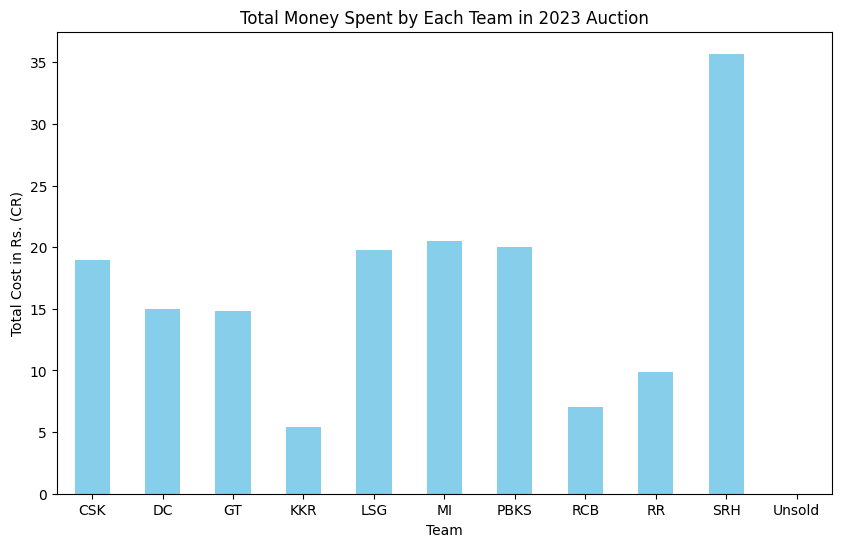

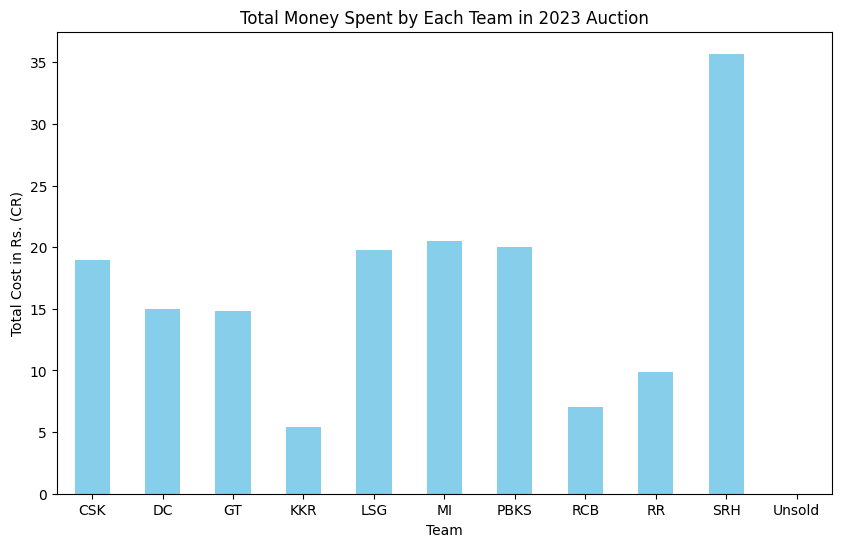

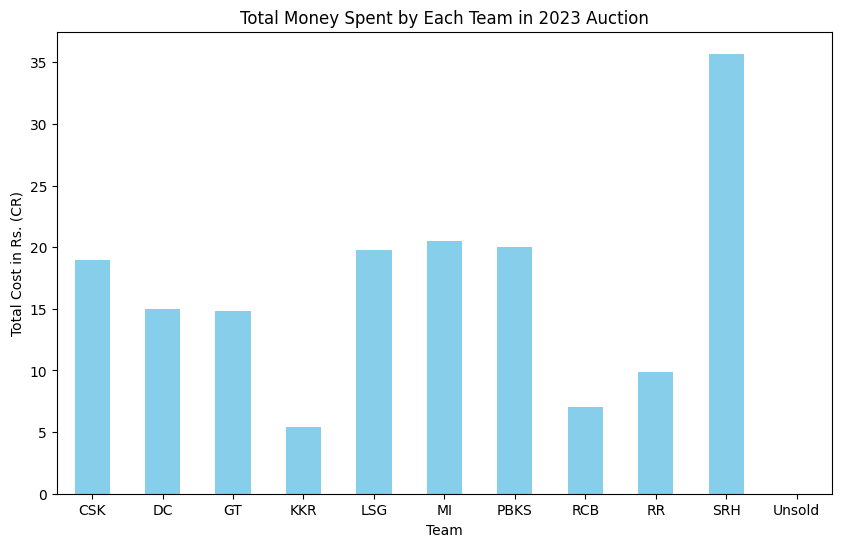

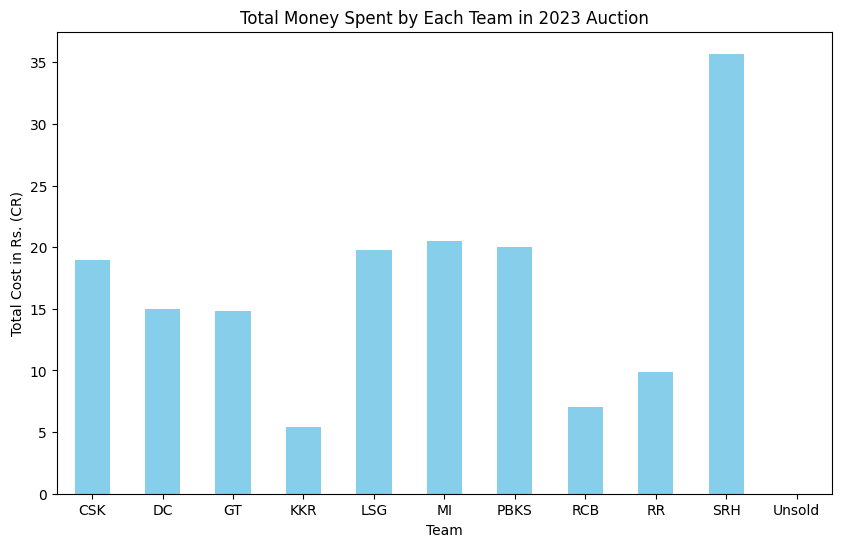

Traceback (most recent call last):
  File "/home/prem/.local/lib/python3.9/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 307, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/home/prem/.local/lib/python3.9/site-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/home/prem/.local/lib/python3.9/site-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/home/prem/.local/lib/python3.9/site-packages/pandasai/pipelines/chat/code_execution.py", line 113, in execute
    raise e
  File "/home/prem/.local/lib/python3.9/site-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
  File "/home/prem/.local/lib/python3.9/site-packages/pandasai/pipelines/chat/code_execution.py", line 175, in execute_code
    raise NoResultFoundError("No result returned")
pandasai.exceptions.NoResu

'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo result returned\n'

In [13]:
sdf.chat('Draw a Bargraph showing How much money was spent by each team this season overall.')

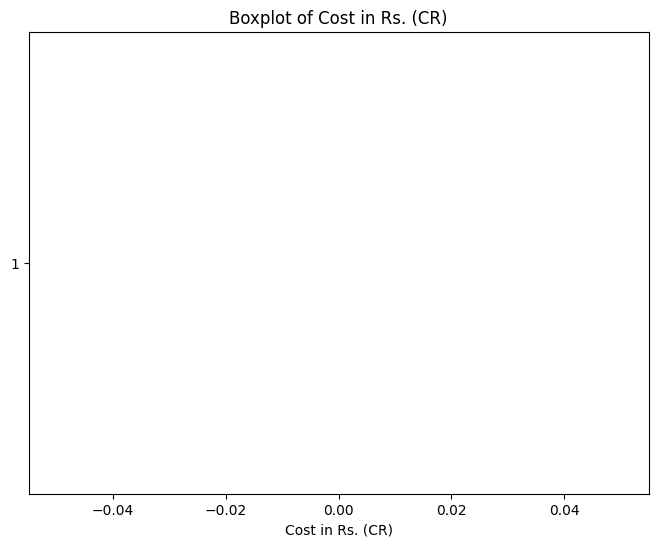

'Mean cost: 0.6872427983539094, Median cost: 0.0, Max cost: 18.5, Min cost: 0.0'

In [20]:
sdf.chat('Perform univariate analysis')

<string>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
Traceback (most recent call last):
  File "/home/prem/.local/lib/python3.9/site-packages/pandasai/pipelines/chat/code_execution.py", line 96, in execute
    if not OutputValidator.validate_result(result):
  File "/home/prem/.local/lib/python3.9/site-packages/pandasai/helpers/output_validator.py", line 73, in validate_result
    raise InvalidOutputValueMismatch(
pandasai.exceptions.InvalidOutputValueMismatch: Result must be in the format of dictionary of type and value

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/prem/.local/lib/python3.9/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 307, in run
    output = (self.code_generation_pipeline | self.code_execution_pipe

'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo code found in the response\n'

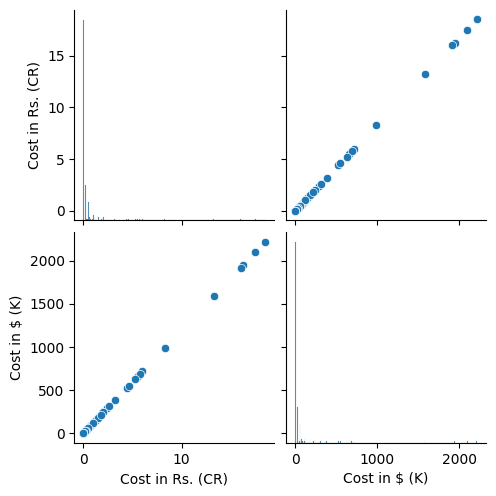

In [24]:
sdf.chat('Perform multivariate analysis')